In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')


In [17]:
with open("russian_names.txt") as input_file:
    names = input_file.read()[:-1].split('\n')
    names = [' ' + line for line in names]

In [18]:
names[:15]

[' Ababko',
 ' Abaev',
 ' Abagyan',
 ' Abaidulin',
 ' Abaidullin',
 ' Abaimoff',
 ' Abaimov',
 ' Abakeliya',
 ' Abakovsky',
 ' Abakshin',
 ' Abakumoff',
 ' Abakumov',
 ' Abakumtsev',
 ' Abakushin',
 ' Abalakin']

(array([1.000e+00, 5.300e+01, 1.590e+02, 0.000e+00, 6.110e+02, 1.213e+03,
        1.730e+03, 0.000e+00, 1.847e+03, 1.614e+03, 0.000e+00, 1.142e+03,
        5.870e+02, 2.700e+02, 0.000e+00, 1.030e+02, 3.800e+01, 0.000e+00,
        8.000e+00, 5.000e+00, 2.300e+01, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00]),
 array([ 3.  ,  3.72,  4.44,  5.16,  5.88,  6.6 ,  7.32,  8.04,  8.76,
         9.48, 10.2 , 10.92, 11.64, 12.36, 13.08, 13.8 , 14.52, 15.24,
        15.96, 16.68, 17.4 , 18.12, 18.84, 19.56, 20.28, 21.  ]),
 <a list of 25 Patch objects>)

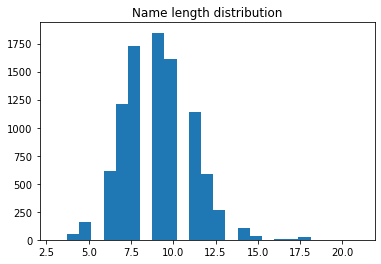

In [22]:
plt.title('Name length distribution')
plt.hist(list(map(len, names)), bins=25)

In [24]:
tokens = list(set(''.join(names)))
print(tokens)
num_tokens = len(tokens)
print('num_tokens = ', num_tokens)

['l', 'd', 'J', 't', 'D', 'H', 'P', 'Y', 'f', 'c', 's', 'b', 'C', 'u', 'k', 'U', 'B', '-', 'j', 'N', 'Z', 'w', 'O', 'F', 'y', '\xa0', 'S', ' ', ',', 'i', 'h', 'E', 'm', 'R', 'g', 'a', 'V', 'M', 'В', 'K', 'L', 'v', 'I', 'z', 'p', "'", 'n', 'e', 'r', 'A', 'o', 'G', 'T']
num_tokens =  53


In [11]:
token_to_id = {token: idx for idx, token in enumerate(tokens)}

In [12]:
token_to_id

{'l': 0,
 'd': 1,
 'J': 2,
 't': 3,
 'D': 4,
 'H': 5,
 'P': 6,
 'Y': 7,
 'f': 8,
 'c': 9,
 's': 10,
 'b': 11,
 'C': 12,
 'u': 13,
 'k': 14,
 'U': 15,
 'B': 16,
 '-': 17,
 'j': 18,
 'N': 19,
 'Z': 20,
 'w': 21,
 'O': 22,
 'F': 23,
 'y': 24,
 '\xa0': 25,
 'S': 26,
 ' ': 27,
 ',': 28,
 'i': 29,
 'h': 30,
 'E': 31,
 'm': 32,
 'R': 33,
 'g': 34,
 'a': 35,
 'V': 36,
 'M': 37,
 'В': 38,
 'K': 39,
 'L': 40,
 'v': 41,
 'I': 42,
 'z': 43,
 'p': 44,
 "'": 45,
 'n': 46,
 'e': 47,
 'r': 48,
 'A': 49,
 'o': 50,
 'G': 51,
 'T': 52}

In [29]:
assert len(tokens) == len(token_to_id)

for i in range(num_tokens):
    assert token_to_id[tokens[i]] == i
print("OK")

OK


In [80]:
def to_matrix(data, token_dict, max_len=None, dtype='int32', batch_first=True):
    max_len = max_len or max(map(len, data))
    data_ix = np.zeros([len(data), max_len], dtype) + token_dict[' ']
    
    for i in range(len(data)):
        line_ix = [token_dict[c] for c in data[i]]
        data_ix[i, :len(line_ix)] = line_ix
        
    if not batch_first:
        data_ix = np.transpose(data_ix)
        
    return data_ix

In [81]:
print('\n'.join(names[::2000]))
print(to_matrix(names[::2000], token_to_id))


 Ababko
 Chihachev
 Isaikov
 Nakhamkin
 Ustenko
[[27 49 11 35 11 14 50 27 27 27]
 [27 12 30 29 30 35  9 30 47 41]
 [27 42 10 35 29 14 50 41 27 27]
 [27 19 35 14 30 35 32 14 29 46]
 [27 15 10  3 47 46 14 50 27 27]]
